# About Dataset

**🌟 Background:**

Market analysis and forecasting are essential components of decision-making in various industries. Leveraging machine learning techniques, particularly time series analysis, allows for deeper insights into historical market data, facilitating accurate predictions of future trends. This project focuses on developing a robust time series machine learning model to forecast market trends based on historical data.

**🌟 Objective:**

The primary goal is to create a predictive model capable of forecasting the quantity and prices of commodities for future months. This model aims to empower stakeholders with actionable insights for production planning, procurement strategies, pricing decisions, and resource allocation.

**🌟Data Description:**

The dataset contains monthly market data spanning multiple years and regions. It includes information on various commodities, their quantities, and pricing details. The columns in the dataset are as follows:

- market: The market or commodity under consideration.
- month: The recorded month.
- year: The corresponding year of the recorded data.
- quantity: The quantity of the commodity traded or available.
- priceMin: The minimum price of the commodity during the month.
- priceMax: The maximum price of the commodity during the month.
- priceMod: The mode or most frequently occurring price of the commodity during the month.
- state: The state or region where the market is located.
- city: The city where the market is situated.
- date: The specific date of the recorded data.



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ❄️ Import Libraries

In [40]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical operations
import numpy as np

# Import matplotlib for plotting and visualization
import matplotlib.pyplot as plt

# Import seaborn for statistical data visualization
import seaborn as sns

# Import train_test_split for data splitting
from sklearn.model_selection import train_test_split

# Import statsmodels.api for statistical model API
import statsmodels.api as sm

# Import adfuller from statsmodels for testing for stationary price
from statsmodels.tsa.stattools import adfuller

# Import autocorrelation_plot from pandas for autocorrelation plot
from pandas.plotting import autocorrelation_plot

# Import plot_acf and plot_pacf from statsmodels for auto correlation and partial auto correlation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Import ARIMA from statsmodels for ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Import SARIMAX from statsmodels for SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Import Prophet from prophet for time series forecasting
from prophet import Prophet

# Import Sequential, LSTM, Dense, and Dropout from keras for LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Import LabelEncoder and MinMaxScaler from sklearn for preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Import mean_squared_error and mean_absolute_error from sklearn for evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Import math for mathematical operations
import math

# Suppress warnings
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")  # Suppressing ARIMA warnings


# ⛄ Data Loading

In [47]:
price = pd.read_csv("/content/drive/MyDrive/Problem Statement - Market Price Prediction/MarketPricePrediction.csv")

price.head(5)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


# 🐱 EDA and Preprocessing

In [48]:
print(f"shape of dataset: {price.shape}")

#drop duplicate and unnecesaary columns
price.drop(['market', 'date'], axis = 1, inplace = True)
#to drop duplicate value
price.drop_duplicates(inplace=True)

#dataset info (check missing value and data type)
print(f"dataset information: {price.info()}")
print(f"about dataset: {price.describe()}")

#about city
print(f"about city: {price['city'].value_counts()}")
#about year
print(f"about year: {price['year'].value_counts()}")



shape of dataset: (10227, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   month     10227 non-null  object
 1   year      10227 non-null  int64 
 2   quantity  10227 non-null  int64 
 3   priceMin  10227 non-null  int64 
 4   priceMax  10227 non-null  int64 
 5   priceMod  10227 non-null  int64 
 6   state     10227 non-null  object
 7   city      10227 non-null  object
dtypes: int64(5), object(3)
memory usage: 639.3+ KB
dataset information: None
about dataset:                year      quantity      priceMin      priceMax      priceMod
count  10227.000000  1.022700e+04  10227.000000  10227.000000  10227.000000
mean    2009.022294  7.660488e+04    646.944363   1212.760731    984.284345
std        4.372841  1.244087e+05    673.121850    979.658874    818.471498
min     1996.000000  2.000000e+01     16.000000    145.000000     80.000000
25%     2

In [49]:
# Select only the numeric columns from the dataset
numeric_df = price.select_dtypes(include=[np.number])

#display o numeric cols
print(f"output of numeric cols: {numeric_df.columns}")
# Display the first few rows of the numeric columns
print("\nFirst few rows of the numeric columns:")
print(numeric_df.head())

output of numeric cols: Index(['year', 'quantity', 'priceMin', 'priceMax', 'priceMod'], dtype='object')

First few rows of the numeric columns:
   year  quantity  priceMin  priceMax  priceMod
0  2005      2350       404       493       446
1  2006       900       487       638       563
2  2010       790      1283      1592      1460
3  2011       245      3067      3750      3433
4  2012      1035       523       686       605


In [50]:
#num_cols = price.select_dtypes(include=np.number).columns.tolist()
#print(f"List of columns with numerical data: {num_cols}")

### 🔕 Outliers

Identifying and removing outliers is crucial for maintaining the integrity and accuracy of the dataset. Outliers, represented by :warning: icons, can significantly skew statistical analyses and machine learning models, leading to misleading insights and predictions. Removing outliers ensures that the data reflects true patterns and trends, enhancing the reliability and effectiveness of subsequent analyses and models.

List of columns with numerical data: ['priceMin', 'priceMax', 'priceMod']



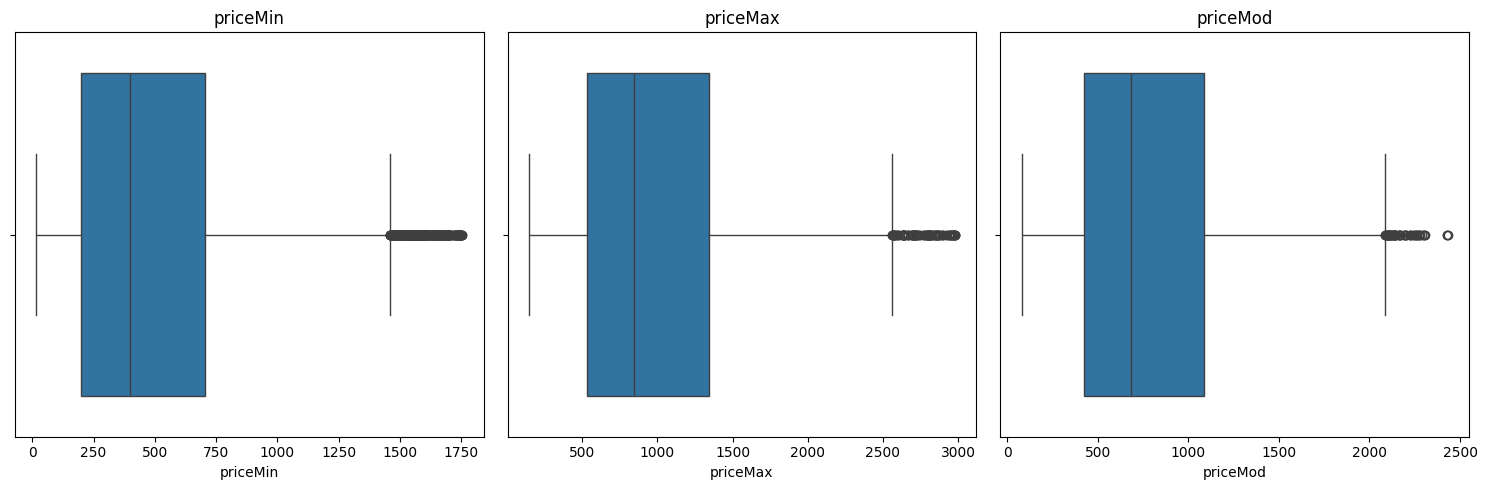

Cleaned Data:

          month  year  quantity  priceMin  priceMax  priceMod state    city
0       January  2005      2350       404       493       446    PB  ABOHAR
1       January  2006       900       487       638       563    PB  ABOHAR
2       January  2010       790      1283      1592      1460    PB  ABOHAR
4       January  2012      1035       523       686       605    PB  ABOHAR
5       January  2013       675      1327      1900      1605    PB  ABOHAR
...         ...   ...       ...       ...       ...       ...   ...     ...
10222  December  2011    131326       282       612       526    MS   YEOLA
10223  December  2012    207066       485      1327      1136    MS   YEOLA
10224  December  2013    215883       472      1427      1177    MS   YEOLA
10225  December  2014    201077       446      1654      1456    MS   YEOLA
10226  December  2015    223315       609      1446      1126    MS   YEOLA

[9329 rows x 8 columns]
Shape of cleaned_data: (9329, 8)


In [52]:
# Select numerical columns
numeric_cols = ['priceMin', 'priceMax', 'priceMod']
print(f"List of columns with numerical data: {numeric_cols}\n")
# Define function to identify rows with outliers
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Apply the function to each numerical column and combine the results
outliers_mask = False
for col in numeric_cols:
    outliers_mask |= detect_outliers(price[col])

# Invert the mask to get rows without outliers
cleaned_data = price[~outliers_mask].copy()

# Set up the plot
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(15, 5))

# Plot box plots for each numerical column
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=cleaned_data[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

# Generate the cleaned dataframe
print("Cleaned Data:\n")
print(cleaned_data)
print(f"Shape of cleaned_data: {cleaned_data.shape}")


In [53]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9329 entries, 0 to 10226
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   month     9329 non-null   object
 1   year      9329 non-null   int64 
 2   quantity  9329 non-null   int64 
 3   priceMin  9329 non-null   int64 
 4   priceMax  9329 non-null   int64 
 5   priceMod  9329 non-null   int64 
 6   state     9329 non-null   object
 7   city      9329 non-null   object
dtypes: int64(5), object(3)
memory usage: 655.9+ KB


### 🎉 Numeric Coversion

In [54]:
# Label encode the 'month' column
def numeric_conversion(df):
  df = df.copy()
  label_encoder = LabelEncoder()
  #df['month'] = label_encoder.fit_transform(df['month'])
  # Define a dictionary to map month names to numerical values
  month_to_num = {'January': 1, 'February': 2, 'March': 3,'April': 4,
                'May': 5, 'June': 6, 'July': 7, 'August': 8,
                'September': 9, 'October': 10, 'November': 11, 'December': 12}
  # Map the month names to numerical values
  df['month'] = df['month'].map(month_to_num)

  df['state'] = label_encoder.fit_transform(df['state'])
  df['city'] = label_encoder.fit_transform(df['city'])

  return df

dataprep = numeric_conversion(cleaned_data)
#resulted output
dataprep.head(5)

,month,year,quantity,priceMin,priceMax,priceMod,state,city
0,1,2005,2350,404,493,446,16,0
1,1,2006,900,487,638,563,16,0
2,1,2010,790,1283,1592,1460,16,0
4,1,2012,1035,523,686,605,16,0
5,1,2013,675,1327,1900,1605,16,0


In [12]:
dataprep['month'].value_counts()


month
2     911
1     861
5     830
4     825
3     815
6     811
12    775
7     764
11    721
9     685
10    669
8     662
Name: count, dtype: int64

### ⏰ Prepare Date Column

In [55]:
# Combine 'year' and 'month' columns into a single string representing the date
dataprep['date'] = dataprep['year'].astype(str) + '-' + dataprep['month'].astype(str).str.zfill(2)

# Convert the combined string to datetime format
dataprep['date'] = pd.to_datetime(dataprep['date'])

# Drop 'year' and 'month' columns if you don't need them anymore
dataprep.drop(['year', 'month'], axis=1, inplace=True)

# Sort the dataframe by the 'date' column
dataprep = dataprep.sort_values(by='date')

# Set the 'date' column as the index of the dataframe
dataprep.set_index('date', inplace=True)


In [56]:
dataprep

,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,
1996-01-01,225063,160,257,226,14,62
1996-02-01,196164,133,229,186,14,62
1996-03-01,178992,155,274,243,14,62
1996-04-01,192592,136,279,254,14,62
1996-05-01,237574,154,312,269,14,62
...,...,...,...,...,...,...
2016-02-01,168020,1246,1368,1309,20,58
2016-02-01,145241,483,1019,753,14,68
2016-02-01,220465,428,1258,896,4,28


In [12]:
dataprep.columns

Index(['quantity', 'priceMin', 'priceMax', 'priceMod', 'state', 'city'], dtype='object')

### 📷 Plotting Market Data

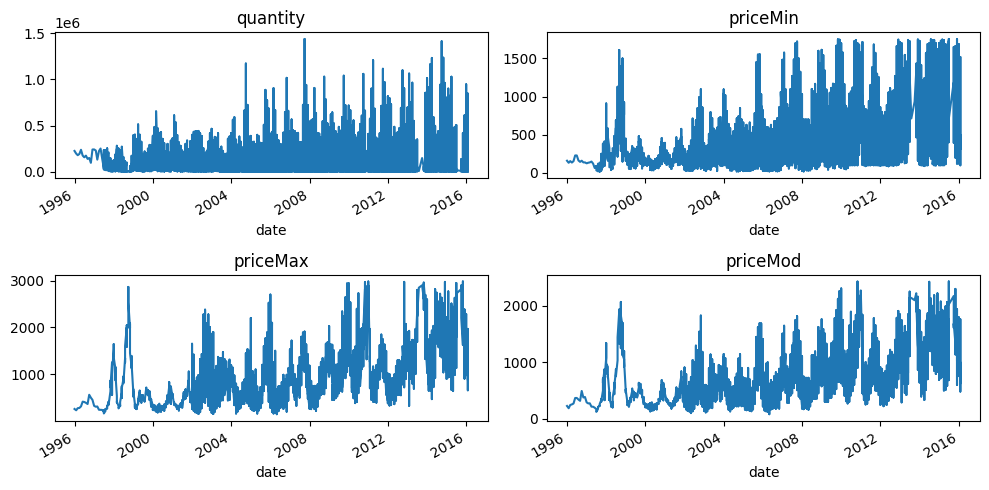

In [57]:
# Define the columns to plot
columns_to_plot = ['quantity', 'priceMin', 'priceMax', 'priceMod']

# Create subplots for each row
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Plot each row
for i, column in enumerate(columns_to_plot):
    dataprep[column].plot(ax=axs[i//2, i%2], kind='line')
    axs[i//2, i%2].set_title(f'{column}')

plt.tight_layout()
plt.show()


### 💰 Calculating and Plotting Weighted Average

In [58]:
# Specify the weights for each column
weight_min = 0.3
weight_max = 0.3
weight_mod = 0.4

# Calculate the weighted average
weighted_avg_price = (weight_min * dataprep['priceMin'] +
                      weight_max * dataprep['priceMax'] +
                      weight_mod * dataprep['priceMod'])

# Add the weighted average as a new column in the DataFrame
dataprep['weighted_avg_price'] = weighted_avg_price

dataprep.drop(['priceMin','priceMax', 'priceMod'], axis = 1, inplace = True)

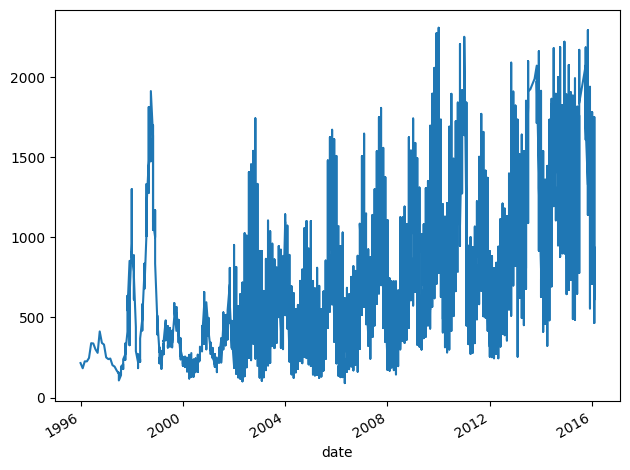

In [59]:
dataprep['weighted_avg_price'].plot(kind='line')
plt.tight_layout()
plt.show()


In [60]:
dataprep

,quantity,state,city,weighted_avg_price
date,,,,
1996-01-01,225063,14,62,215.5
1996-02-01,196164,14,62,183.0
1996-03-01,178992,14,62,225.9
1996-04-01,192592,14,62,226.1
1996-05-01,237574,14,62,247.4
...,...,...,...,...
2016-02-01,168020,20,58,1307.8
2016-02-01,145241,14,68,751.8
2016-02-01,220465,4,28,864.2


# 🙀 Data Aggregation

In [62]:
def data_aggregation(dataprep):
  data = dataprep.copy()
  #data = data.groupby('date').agg({'weighted_avg_price': 'mean', 'quantity': 'mean'}).reset_index()

  print(data)

  # Determine the city with maximum occurrences within each state
  state_city_mode = data.groupby('state')['city'].agg(lambda x: x.mode().iloc[0]).reset_index()
  state_city_mode.columns = ['state', 'city_mode']

  # Merge the mode city back to the original dataframe
  data = data.merge(state_city_mode, left_on=['state', 'city'], right_on=['state', 'city_mode'], how='inner')

  # Aggregate the data
  aggregated_data = dataprep.groupby('date').agg({
      'quantity': 'mean',
      'state': lambda x: x.mode()[0],
      'city': lambda x: x.mode()[0],
      'weighted_avg_price': 'mean'
  }).reset_index()

  # Print the aggregated data
  return aggregated_data

data_final = data_aggregation(dataprep)

data_final

            quantity  state  city  weighted_avg_price
date                                                 
1996-01-01    225063     14    62               215.5
1996-02-01    196164     14    62               183.0
1996-03-01    178992     14    62               225.9
1996-04-01    192592     14    62               226.1
1996-05-01    237574     14    62               247.4
...              ...    ...   ...                 ...
2016-02-01    168020     20    58              1307.8
2016-02-01    145241     14    68               751.8
2016-02-01    220465      4    28               864.2
2016-02-01     13414     12    87               893.5
2016-02-01      4675     14    47               614.9

[9329 rows x 4 columns]


,date,quantity,state,city,weighted_avg_price
0,1996-01-01,225063.000000,14,62,215.500000
1,1996-02-01,196164.000000,14,62,183.000000
2,1996-03-01,178992.000000,14,62,225.900000
3,1996-04-01,192592.000000,14,62,226.100000
4,1996-05-01,237574.000000,14,62,247.400000
...,...,...,...,...,...
234,2015-10-01,45478.454545,12,13,1919.581818
235,2015-11-01,78184.196078,14,2,1648.672549
236,2015-12-01,96727.059524,14,1,1265.453571
237,2016-01-01,113371.888889,14,1,1124.864198


# 📊 Augmented Dickey-Fuller (ADF) for Stationarity Test

The Augmented Dickey-Fuller (ADF) test is a statistical hypothesis test commonly used to determine the stationarity of a time series data. It assesses whether a unit root is present in a given series, which indicates that the data is non-stationary. If the p-value obtained from the test is less than a chosen significance level (such as 0.05), the null hypothesis of non-stationarity is rejected, indicating that the data is stationary.

In [64]:
#test_result = adfuller(dataprep['priceMod'])
#H0: Data is Non Stationary
#H1: Data is Stationary


def adfuller_stationary_test(modified_price):
  result = adfuller(modified_price)
  labels = ['ADF Test Statistics', 'p-value', '#Lags Used', 'Number of Observations Used']

  for value, label in zip(result, labels):
    print(label + ':' +str(round(value, 6)))
  #p-value
  if result[1] <= 0.05:
    print("Strong Evidence Against Null Hypothesis. Null Hypothesis(H0) rejected. Indicating Alternative(H1) and Stationary Data")
  else:
    print("Weak Evidence Against Null Hypothesis. Null Hypothesis(H0) accepted. Non Stationary Data")

#output
for col in ['quantity', 'weighted_avg_price']:
  print(f"\nFor {col}:")
  adfuller_stationary_test(data_final[col])


For quantity:
ADF Test Statistics:-4.343743
p-value:0.000373
#Lags Used:14
Number of Observations Used:224
Strong Evidence Against Null Hypothesis. Null Hypothesis(H0) rejected. Indicating Alternative(H1) and Stationary Data

For weighted_avg_price:
ADF Test Statistics:-2.120982
p-value:0.236162
#Lags Used:6
Number of Observations Used:232
Weak Evidence Against Null Hypothesis. Null Hypothesis(H0) accepted. Non Stationary Data


# 📊 Seasonal Analysis for Weighted Average Price and Quantity

This function generates seasonal difference, applies the Dickey-Fuller test, and plots the autocorrelation function (ACF) and partial autocorrelation function (PACF) for the weighted average price data. It helps assess stationarity and identify seasonality patterns in the time series data.

Generated Output for weighted_avg_price
Dataset output
          date       quantity  state  city  weighted_avg_price  \
0   1996-01-01  225063.000000     14    62          215.500000   
1   1996-02-01  196164.000000     14    62          183.000000   
2   1996-03-01  178992.000000     14    62          225.900000   
3   1996-04-01  192592.000000     14    62          226.100000   
4   1996-05-01  237574.000000     14    62          247.400000   
..         ...            ...    ...   ...                 ...   
234 2015-10-01   45478.454545     12    13         1919.581818   
235 2015-11-01   78184.196078     14     2         1648.672549   
236 2015-12-01   96727.059524     14     1         1265.453571   
237 2016-01-01  113371.888889     14     1         1124.864198   
238 2016-02-01   79671.049383     14     1          902.638272   

     Seasonalweighted_avg_priceFirst Difference  
0                                           NaN  
1                                           NaN  
2 

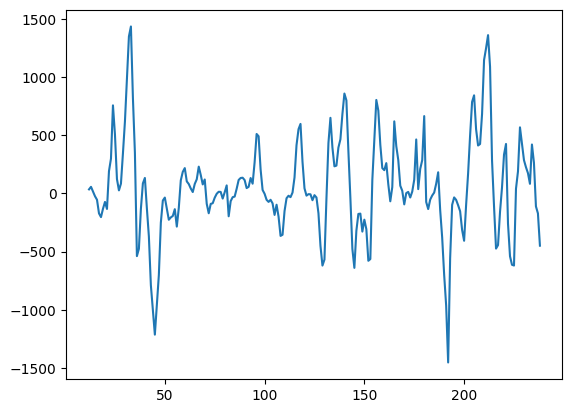

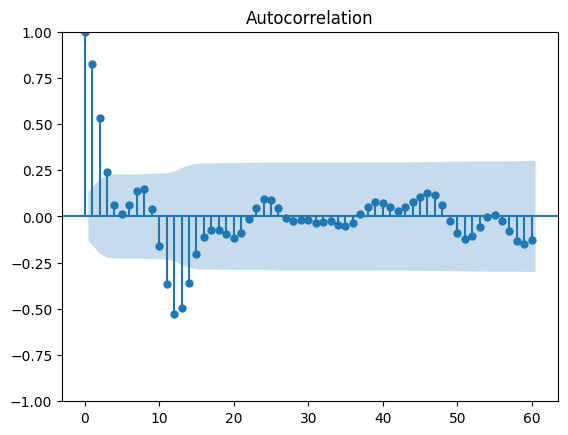

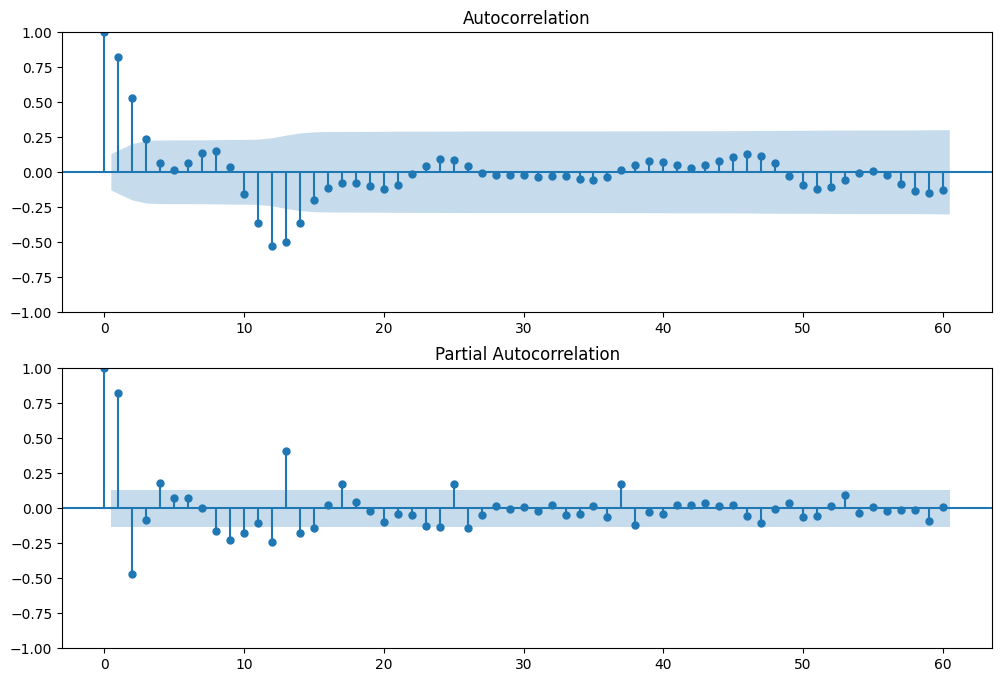

In [65]:
def seasonal_output(input_cols, data_final):
    # Calculate seasonal difference
    print('Generated Output for ' + input_cols)
    data_final['Seasonal' + input_cols + 'First Difference'] = data_final[input_cols] - data_final[input_cols].shift(12)
    print('Dataset output')
    print(data_final)
    # Apply Dickey-Fuller test and handle null values
    adf_result = adfuller(data_final['Seasonal' + input_cols + 'First Difference'].dropna())
    print("ADF Test Statistics:", adf_result[0])
    print("p-value:", adf_result[1])
    print("#Lags Used:", adf_result[2])
    print("Number of Observations Used:", adf_result[3])
    if adf_result[1] < 0.05:
        print("Strong Evidence Against Null Hypothesis. Null Hypothesis(H0) rejected. Indicating Alternative(H1) and Stationary Data")
    else:
        print("Insufficient evidence to reject the null hypothesis. Data may not be stationary.")

    # Plot seasonal difference
    data_final['Seasonal' + input_cols + 'First Difference'].plot()
    plt.show()

    # Auto-correlation plot
    plot_acf(data_final['Seasonal' + input_cols + 'First Difference'].iloc[13:], lags=60)
    plt.show()

    # ACF and PACF
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    sm.graphics.tsa.plot_acf(data_final['Seasonal' + input_cols + 'First Difference'].iloc[13:], lags=60, ax=ax1)
    sm.graphics.tsa.plot_pacf(data_final['Seasonal' + input_cols + 'First Difference'].iloc[13:], lags=60, ax=ax2)
    plt.show()

# dataprep DataFrame
seasonal_output('weighted_avg_price', data_final)


Generated Output for quantity
Dataset output
          date       quantity  state  city  weighted_avg_price  \
0   1996-01-01  225063.000000     14    62          215.500000   
1   1996-02-01  196164.000000     14    62          183.000000   
2   1996-03-01  178992.000000     14    62          225.900000   
3   1996-04-01  192592.000000     14    62          226.100000   
4   1996-05-01  237574.000000     14    62          247.400000   
..         ...            ...    ...   ...                 ...   
234 2015-10-01   45478.454545     12    13         1919.581818   
235 2015-11-01   78184.196078     14     2         1648.672549   
236 2015-12-01   96727.059524     14     1         1265.453571   
237 2016-01-01  113371.888889     14     1         1124.864198   
238 2016-02-01   79671.049383     14     1          902.638272   

     Seasonalweighted_avg_priceFirst Difference  \
0                                           NaN   
1                                           NaN   
2        

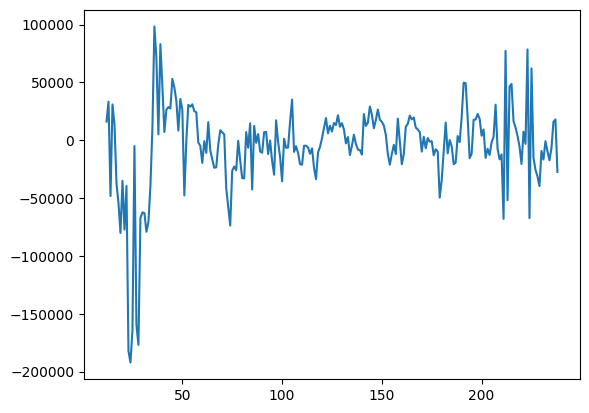

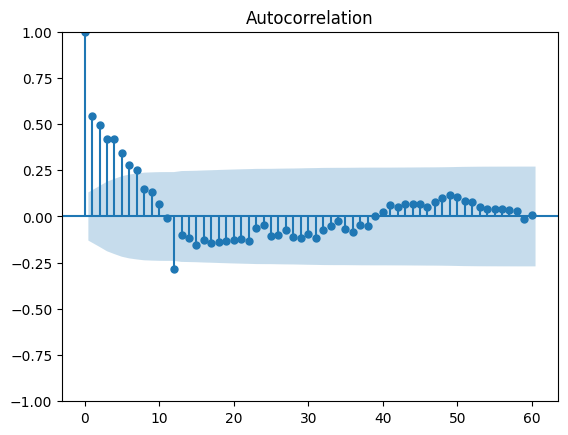

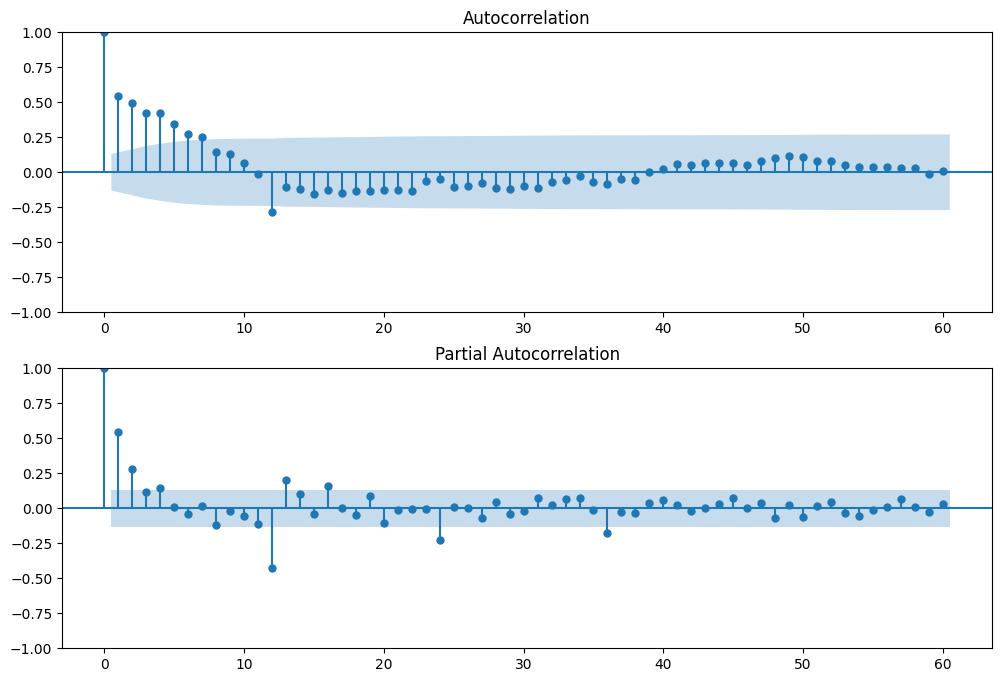

In [66]:
# dataprep DataFrame
seasonal_output('quantity', data_final)

# 😺 Model Building ARIMA Model

ARIMA (AutoRegressive Integrated Moving Average) combines autoregression (AR) and moving average (MA) components with differencing to handle non-stationary data. It's characterized by three parameters: p (AR order), d (differencing degree), and q (MA order). 📊

Why ARIMA for Forecasting:

ARIMA is a widely-used forecasting model due to its simplicity, flexibility, and effectiveness in capturing various time series patterns. By incorporating autoregressive and moving average components, along with differencing for stationarity, ARIMA can model diverse data types, making it valuable across finance, economics, and climate science. 🎯


In [98]:
# p =1 : drop sharply at 1 in x-axis of pacf [p can be evaluated good by pacf]
# q =1 : drop sharply shutoff at 1 in x-axis of acf [p can be evaluated good by acf]
# d = 1: for single shifting



In [67]:
data_final.columns


Index(['date', 'quantity', 'state', 'city', 'weighted_avg_price',
       'Seasonalweighted_avg_priceFirst Difference',
       'SeasonalquantityFirst Difference'],
      dtype='object')

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  238
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1536.474
Date:                Fri, 31 May 2024   AIC                           3078.948
Time:                        09:56:04   BIC                           3089.352
Sample:                             0   HQIC                          3083.141
                                - 238                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2985      0.150      1.995      0.046       0.005       0.592
ma.L1          0.1804      0.154      1.170      0.242      -0.122       0.482
sigma2      2.501e+04   1147.267     21.803      0.0

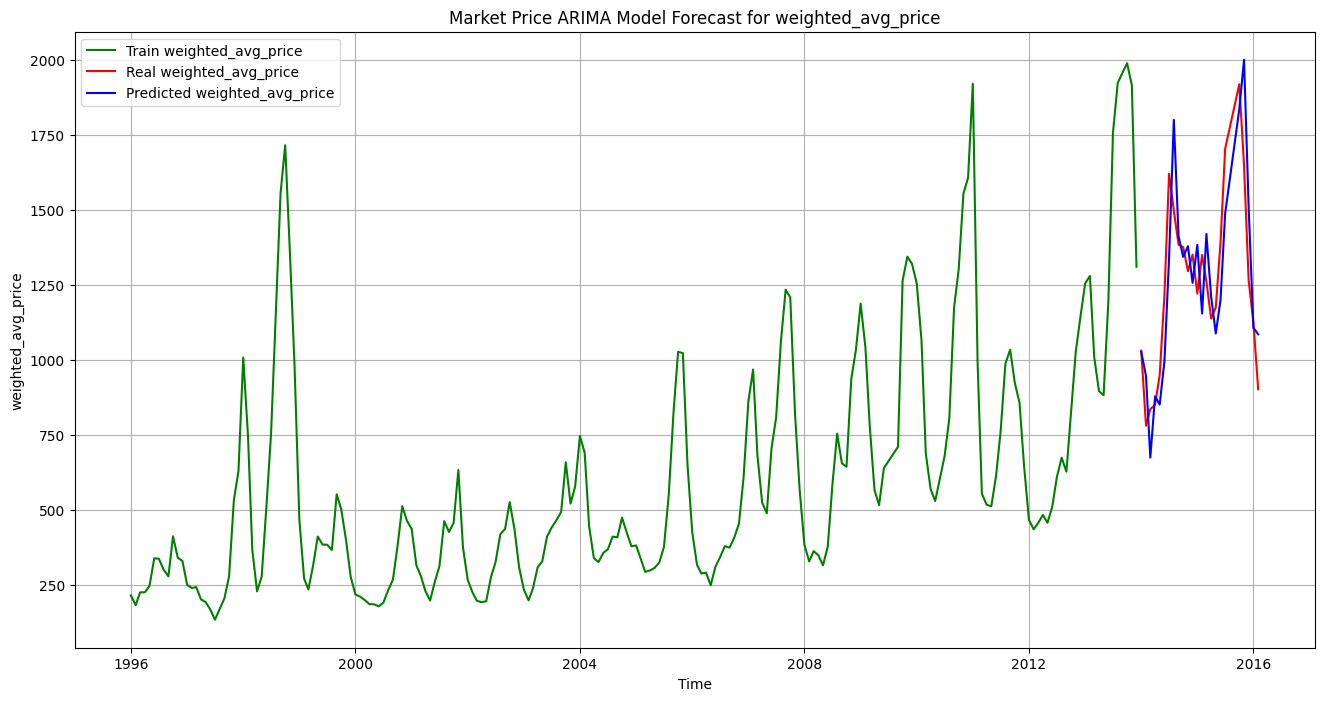

,Test_date,Test_weighted_avg_price,Forecast_weighted_avg_price
215,2014-01-01,1031.363333,1027.669359
216,2014-02-01,781.409836,946.793194
217,2014-03-01,836.593333,674.974455
218,2014-04-01,851.284746,879.268589
219,2014-05-01,949.706897,851.705363
220,2014-06-01,1217.055000,996.386244
221,2014-07-01,1621.259524,1337.880590
222,2014-08-01,1498.344231,1800.683056
223,2014-09-01,1384.133333,1412.329082
224,2014-10-01,1376.507018,1344.001997


In [68]:
def arima_forecast(data_final, target_variable, order=(1,1,1)):
    # Copying the dataframe to avoid unintended modifications

    features = data_final.copy()
    features.drop(['state', 'city',
       'Seasonalweighted_avg_priceFirst Difference',
       'SeasonalquantityFirst Difference'], axis = 1, inplace = True)

    # Data splitting
    train_size = int(len(features) * 0.9)
    train, test = features[:train_size], features[train_size:]
    train_data = train[target_variable]
    test_data = test[target_variable]

    history = list(train_data)
    observations = list(test_data)

    # Forecasting
    predictions = list()
    for i in range(len(test_data)):
        # Model fitting
        model = ARIMA(history, order=order)
        model_fit = model.fit()

        output = model_fit.forecast()[0]
        predictions.append(output)
        history.append(test_data.iloc[i])  # Append the true value to history for the next iteration

    # Summary of fit model
    print(model_fit.summary())

    # Evaluation
    mse = mean_squared_error(observations, predictions)
    print('Mean Squared Error for', target_variable, ':', mse)

    mae = mean_absolute_error(observations, predictions)
    print('Mean Absolute Error for', target_variable, ':', mae)

    rmse = math.sqrt(mean_squared_error(observations, predictions))
    print('Root Mean Squared Error for', target_variable, ':', rmse)

    # Plotting
    plt.figure(figsize=(16,8))
    plt.plot(train['date'], train[target_variable], color='green', label='Train ' + target_variable)
    plt.plot(test['date'], test[target_variable], color='red', label='Real ' + target_variable)
    plt.plot(test['date'], predictions, color='blue', label='Predicted ' + target_variable)
    plt.title('Market Price ARIMA Model Forecast for ' + target_variable)
    plt.xlabel('Time')
    plt.ylabel(target_variable)
    plt.legend()
    plt.grid(True)
    plt.savefig('arima_model.pdf')
    plt.show()

    # Storing results
    result = pd.DataFrame({f'Test_date': test['date'], f'Test_{target_variable}': test[target_variable], f'Forecast_{target_variable}': predictions}, index=test.index)

    return result

# Example usage
final_price_arima = arima_forecast(data_final, target_variable='weighted_avg_price', order=(1, 1, 1))
final_price_arima

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  238
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2743.916
Date:                Fri, 31 May 2024   AIC                           5493.832
Time:                        09:56:43   BIC                           5504.237
Sample:                             0   HQIC                          5498.026
                                - 238                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6768      0.046     14.849      0.000       0.588       0.766
ma.L1         -0.9619      0.032    -29.710      0.000      -1.025      -0.898
sigma2      7.187e+08      3e-11    2.4e+19      0.0

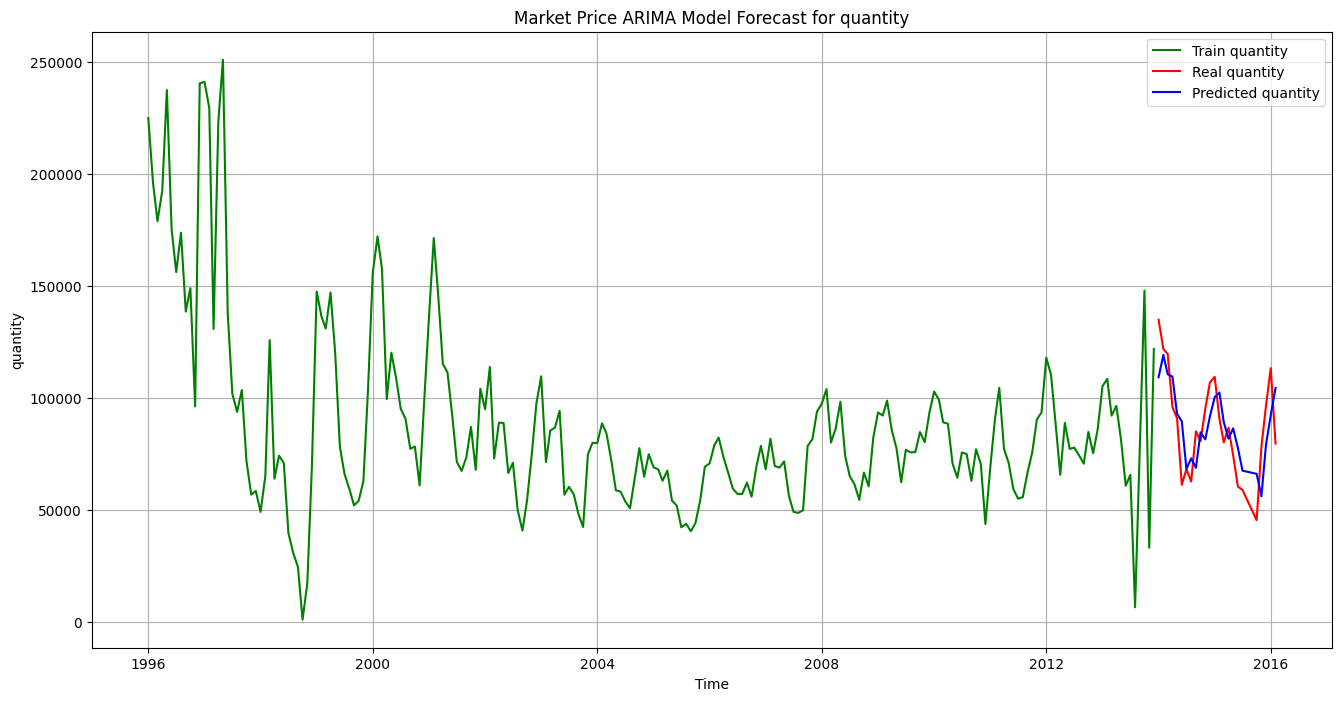

,Test_date,Test_quantity,Forecast_quantity
215,2014-01-01,135014.283333,109330.879326
216,2014-02-01,121911.245902,119337.099817
217,2014-03-01,119769.133333,110656.075257
218,2014-04-01,95980.338983,109636.725126
219,2014-05-01,91055.775862,93013.041008
220,2014-06-01,61250.916667,89613.455006
221,2014-07-01,68308.500000,68321.190196
222,2014-08-01,62748.442308,73078.848967
223,2014-09-01,85176.807018,68880.894979
224,2014-10-01,80782.385965,84696.549317


In [69]:
# Example usage
final_quantity_arima = arima_forecast(data_final, target_variable='quantity', order=(1, 1, 1))
final_quantity_arima

In [70]:
#forcast of price and quantity
arima_final_forcast = pd.merge(final_price_arima, final_quantity_arima, on='Test_date')
arima_final_forcast


,Test_date,Test_weighted_avg_price,Forecast_weighted_avg_price,Test_quantity,Forecast_quantity
0,2014-01-01,1031.363333,1027.669359,135014.283333,109330.879326
1,2014-02-01,781.409836,946.793194,121911.245902,119337.099817
2,2014-03-01,836.593333,674.974455,119769.133333,110656.075257
3,2014-04-01,851.284746,879.268589,95980.338983,109636.725126
4,2014-05-01,949.706897,851.705363,91055.775862,93013.041008
5,2014-06-01,1217.055000,996.386244,61250.916667,89613.455006
6,2014-07-01,1621.259524,1337.880590,68308.500000,68321.190196
7,2014-08-01,1498.344231,1800.683056,62748.442308,73078.848967
8,2014-09-01,1384.133333,1412.329082,85176.807018,68880.894979
9,2014-10-01,1376.507018,1344.001997,80782.385965,84696.549317


# 😺 Model Building SARIMAX Model

SARIMAX combines ARIMA with exogenous variables for time series forecasting. It's ideal for data with seasonal patterns and external influences. SARIMAX parameters capture autoregression, differencing, and moving average components, enhancing forecasting accuracy. 📊

Forecasting with SARIMAX:

SARIMAX excels in forecasting due to its ability to integrate both internal dynamics and external factors. By leveraging exogenous variables, it offers more precise predictions, particularly in scenarios with intricate dependencies and outside influences. 🎯

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  238
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1464.136
Date:                            Fri, 31 May 2024   AIC                           2936.273
Time:                                    09:58:13   BIC                           2949.937
Sample:                                         0   HQIC                          2941.788
                                            - 238                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2394      0.162      1.479      0.139      -0.078       0.557
ma.L1          0.1864      0.169   

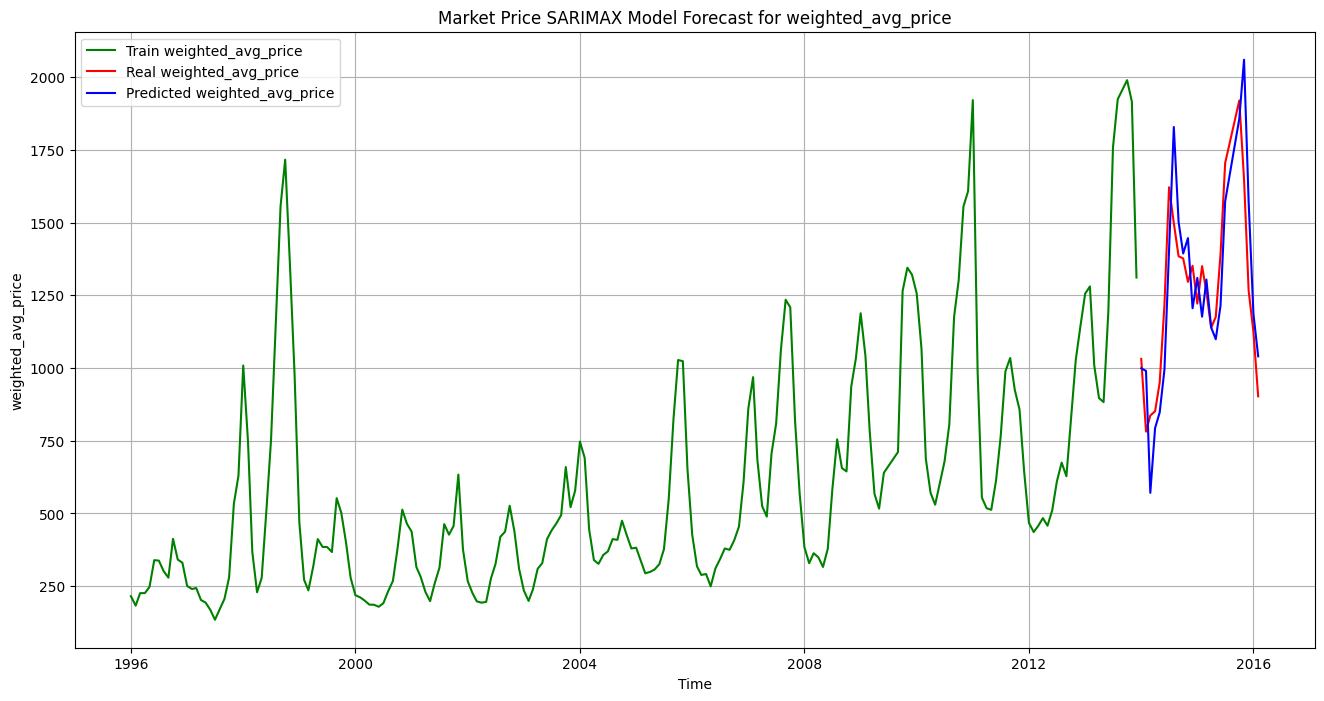

,Test_date,Test_weighted_avg_price,Forecast_weighted_avg_price
215,2014-01-01,1031.363333,998.868747
216,2014-02-01,781.409836,989.968980
217,2014-03-01,836.593333,570.815144
218,2014-04-01,851.284746,793.342370
219,2014-05-01,949.706897,847.159517
220,2014-06-01,1217.055000,994.372722
221,2014-07-01,1621.259524,1405.054941
222,2014-08-01,1498.344231,1828.431752
223,2014-09-01,1384.133333,1502.380484
224,2014-10-01,1376.507018,1393.609426


In [71]:
def sarimax_forecast(data_final, target_variable, order=(1,1,1), seasonal_order=(0, 1, 1, 12)):
    # Copying the dataframe to avoid unintended modifications
    features = data_final.copy()
    features.drop(['state', 'city',
       'Seasonalweighted_avg_priceFirst Difference',
       'SeasonalquantityFirst Difference'], axis = 1, inplace = True)

    # Data splitting
    train_size = int(len(features) * 0.9)
    train, test = features[:train_size], features[train_size:]
    train_data = train[target_variable]
    test_data = test[target_variable]

    history = list(train_data)
    observations = list(test_data)

    # Forecasting
    predictions = list()
    for i in range(len(test_data)):
        # Model fitting
        model = SARIMAX(history,
                         order=order,
                         seasonal_order=seasonal_order)
        model_fit = model.fit()

        output = model_fit.forecast()[0]
        predictions.append(output)
        history.append(test_data.iloc[i])  # Append the true value to history for the next iteration

    # Summary of fit model
    print(model_fit.summary())

    # Evaluation
    mse = mean_squared_error(observations, predictions)
    print('Mean Squared Error for', target_variable, ':', mse)

    mae = mean_absolute_error(observations, predictions)
    print('Mean Absolute Error for', target_variable, ':', mae)

    rmse = math.sqrt(mean_squared_error(observations, predictions))
    print('Root Mean Squared Error for', target_variable, ':', rmse)

    # Plotting
    plt.figure(figsize=(16,8))
    plt.plot(train['date'], train[target_variable], color='green', label='Train ' + target_variable)
    plt.plot(test['date'], test[target_variable], color='red', label='Real ' + target_variable)
    plt.plot(test['date'], predictions, color='blue', label='Predicted ' + target_variable)
    plt.title('Market Price SARIMAX Model Forecast for ' + target_variable)
    plt.xlabel('Time')
    plt.ylabel(target_variable)
    plt.legend()
    plt.grid(True)
    plt.savefig('arima_model.pdf')
    plt.show()

    # Storing results
    result = pd.DataFrame({f'Test_date': test['date'], f'Test_{target_variable}': test[target_variable], f'Forecast_{target_variable}': predictions}, index=test.index)

    return result

# Example usage
final_price_sarimax = sarimax_forecast(data_final, target_variable='weighted_avg_price', order=(1,1,1), seasonal_order=(0, 1, 1, 12))

final_price_sarimax

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  238
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -2608.246
Date:                            Fri, 31 May 2024   AIC                           5224.492
Time:                                    09:58:51   BIC                           5238.157
Sample:                                         0   HQIC                          5230.007
                                            - 238                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1027      0.133      0.775      0.439      -0.157       0.362
ma.L1         -0.4903      0.121   

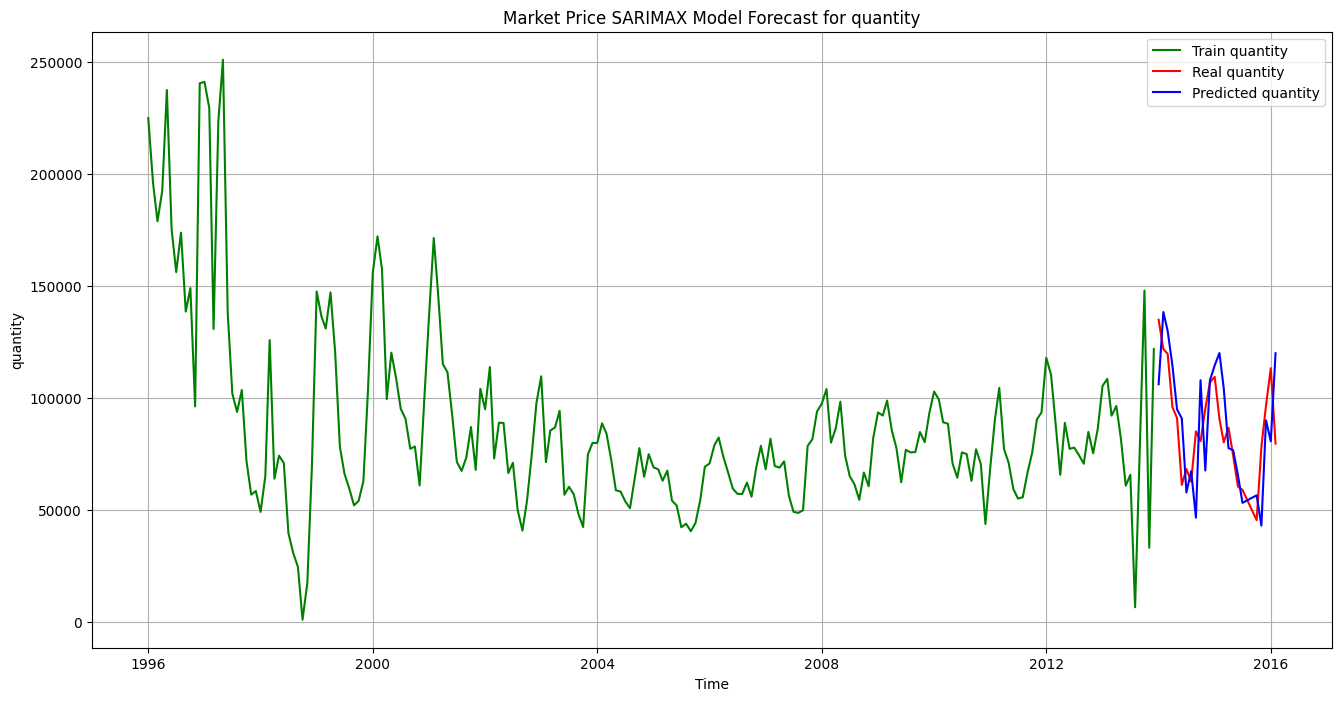

,Test_date,Test_quantity,Forecast_quantity
215,2014-01-01,135014.283333,106172.466430
216,2014-02-01,121911.245902,138434.447751
217,2014-03-01,119769.133333,130020.611236
218,2014-04-01,95980.338983,114580.456306
219,2014-05-01,91055.775862,94923.578472
220,2014-06-01,61250.916667,90941.368697
221,2014-07-01,68308.500000,57857.793160
222,2014-08-01,62748.442308,67352.244429
223,2014-09-01,85176.807018,46593.900242
224,2014-10-01,80782.385965,108008.078760


In [72]:
final_quantity_sarimax = sarimax_forecast(data_final, target_variable='quantity', order=(1,1,1), seasonal_order=(0, 1, 1, 12))

final_quantity_sarimax

In [73]:
#forcast of price and quantity
sarimax_final_forcast = pd.merge(final_price_sarimax, final_quantity_sarimax, on='Test_date')
sarimax_final_forcast


,Test_date,Test_weighted_avg_price,Forecast_weighted_avg_price,Test_quantity,Forecast_quantity
0,2014-01-01,1031.363333,998.868747,135014.283333,106172.466430
1,2014-02-01,781.409836,989.968980,121911.245902,138434.447751
2,2014-03-01,836.593333,570.815144,119769.133333,130020.611236
3,2014-04-01,851.284746,793.342370,95980.338983,114580.456306
4,2014-05-01,949.706897,847.159517,91055.775862,94923.578472
5,2014-06-01,1217.055000,994.372722,61250.916667,90941.368697
6,2014-07-01,1621.259524,1405.054941,68308.500000,57857.793160
7,2014-08-01,1498.344231,1828.431752,62748.442308,67352.244429
8,2014-09-01,1384.133333,1502.380484,85176.807018,46593.900242
9,2014-10-01,1376.507018,1393.609426,80782.385965,108008.078760


# 😺 Model Building Prophet Model

Prophet Model:
Prophet is a robust time series forecasting tool developed by Facebook. It's designed to handle datasets with strong seasonal patterns and multiple seasonality. Prophet is intuitive to use, offering automatic detection of changepoints and holidays, making it suitable for both beginners and experts. 📈

Forecasting with Prophet:
Prophet's strength lies in its ability to capture complex seasonal patterns and incorporate external factors like holidays with ease. Its flexibility and automatic feature selection make it a powerful tool for accurate and efficient forecasting in various domains. 🌟

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj0_cugar/3h4jxjkg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj0_cugar/733jv9x9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37866', 'data', 'file=/tmp/tmpj0_cugar/3h4jxjkg.json', 'init=/tmp/tmpj0_cugar/733jv9x9.json', 'output', 'file=/tmp/tmpj0_cugar/prophet_modeljy3b5bbm/prophet_model-20240531100031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:00:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:00:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Squared Error for weighted_avg_price : 99281.02580450824
Mean Absolute Error for weighted_avg_price : 253.33083640299324
Root Mean Squared Error for weighted_avg_price : 315.0889172987654


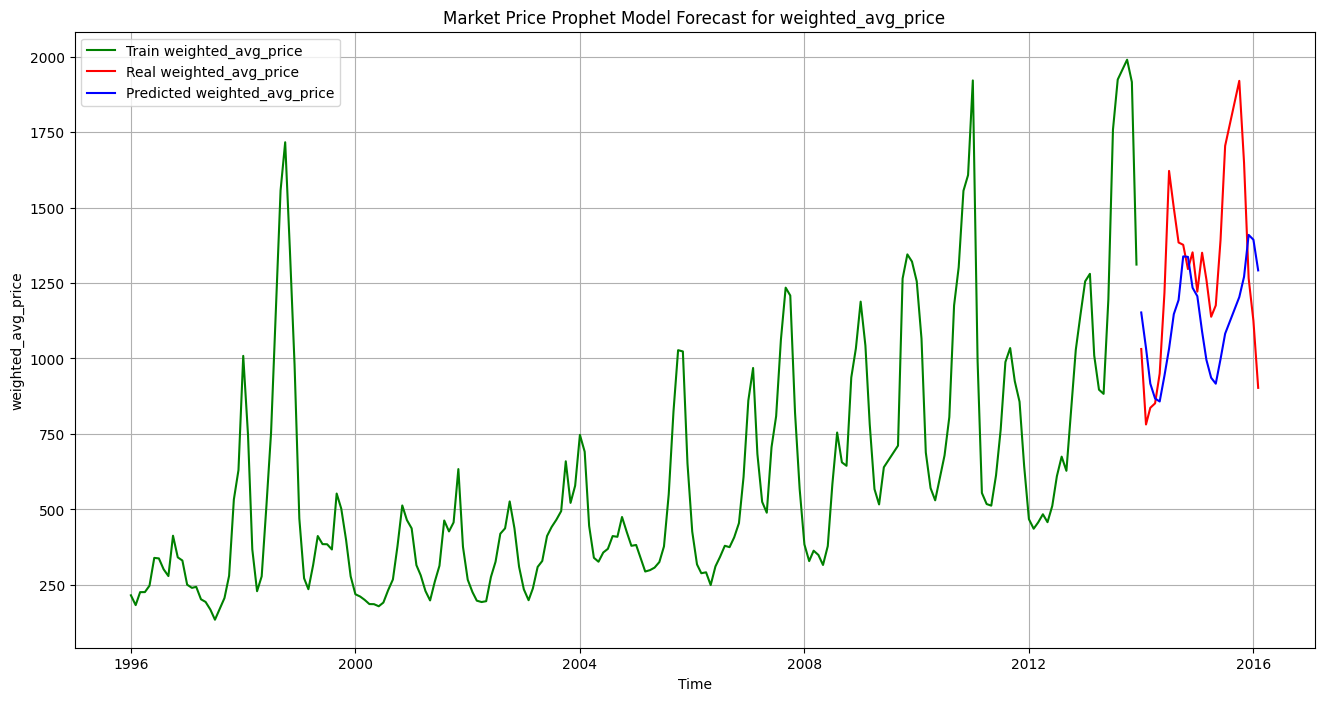

,Test_date,Test_weighted_avg_price,Forecast_weighted_avg_price
215,2014-01-01,1031.363333,1152.361736
216,2014-02-01,781.409836,1034.580654
217,2014-03-01,836.593333,916.570243
218,2014-04-01,851.284746,867.384926
219,2014-05-01,949.706897,857.566056
220,2014-06-01,1217.055000,942.737593
221,2014-07-01,1621.259524,1032.379657
222,2014-08-01,1498.344231,1146.849791
223,2014-09-01,1384.133333,1193.665076
224,2014-10-01,1376.507018,1338.098242


In [74]:
def prophet_forecast(data_final, target_variable):
     # Copying the dataframe to avoid unintended modifications
    features = data_final.copy()
    features.drop(['state', 'city',
       'Seasonalweighted_avg_priceFirst Difference',
       'SeasonalquantityFirst Difference'], axis = 1, inplace = True)

    # Reset index to have 'date' as a column for Prophet
    features.reset_index(inplace=True)

    # Rename columns for Prophet
    features = features.rename(columns={'date': 'ds', target_variable: 'y'})

    # Data splitting
    train_size = int(len(features) * 0.9)
    train, test = features[:train_size], features[train_size:]

    # Fit the Prophet model
    model = Prophet()
    model.fit(train)

    # Forecast future prices
    future = model.make_future_dataframe(periods=len(test), freq='MS')
    forecast = model.predict(future)

    # Evaluation
    mse = mean_squared_error(test['y'], forecast['yhat'][-len(test):])
    mae = mean_absolute_error(test['y'], forecast['yhat'][-len(test):])
    rmse = math.sqrt(mse)

    print('Mean Squared Error for', target_variable, ':', mse)
    print('Mean Absolute Error for', target_variable, ':', mae)
    print('Root Mean Squared Error for', target_variable, ':', rmse)

    # Plotting
    plt.figure(figsize=(16, 8))
    plt.plot(train['ds'], train['y'], color='green', label='Train ' + target_variable)
    plt.plot(test['ds'], test['y'], color='red', label='Real ' + target_variable)
    plt.plot(test['ds'], forecast['yhat'][-len(test):], color='blue', label='Predicted ' + target_variable)
    plt.title('Market Price Prophet Model Forecast for ' + target_variable)
    plt.xlabel('Time')
    plt.ylabel(target_variable)
    plt.legend()
    plt.grid(True)
    plt.savefig('prophet_model.pdf')
    plt.show()

    # Storing results
    #result = pd.DataFrame({f'Test_{target_variable}': test['y'], f'Forecast_{target_variable}': forecast['yhat'], index=test['ds'])
    # Storing results
    result = pd.DataFrame({
        'Test_date': test['ds'],
        f'Test_{target_variable}': test['y'],
        f'Forecast_{target_variable}': forecast['yhat'][-len(test):]
    })

    return result

# Example usage
final_price_prophet = prophet_forecast(data_final, target_variable='weighted_avg_price')

final_price_prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj0_cugar/pnuor0n3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj0_cugar/zal8edsy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71726', 'data', 'file=/tmp/tmpj0_cugar/pnuor0n3.json', 'init=/tmp/tmpj0_cugar/zal8edsy.json', 'output', 'file=/tmp/tmpj0_cugar/prophet_model7eszek8q/prophet_model-20240531100050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:00:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:00:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Squared Error for quantity : 381010612.64662975
Mean Absolute Error for quantity : 16167.79283607524
Root Mean Squared Error for quantity : 19519.493145228687


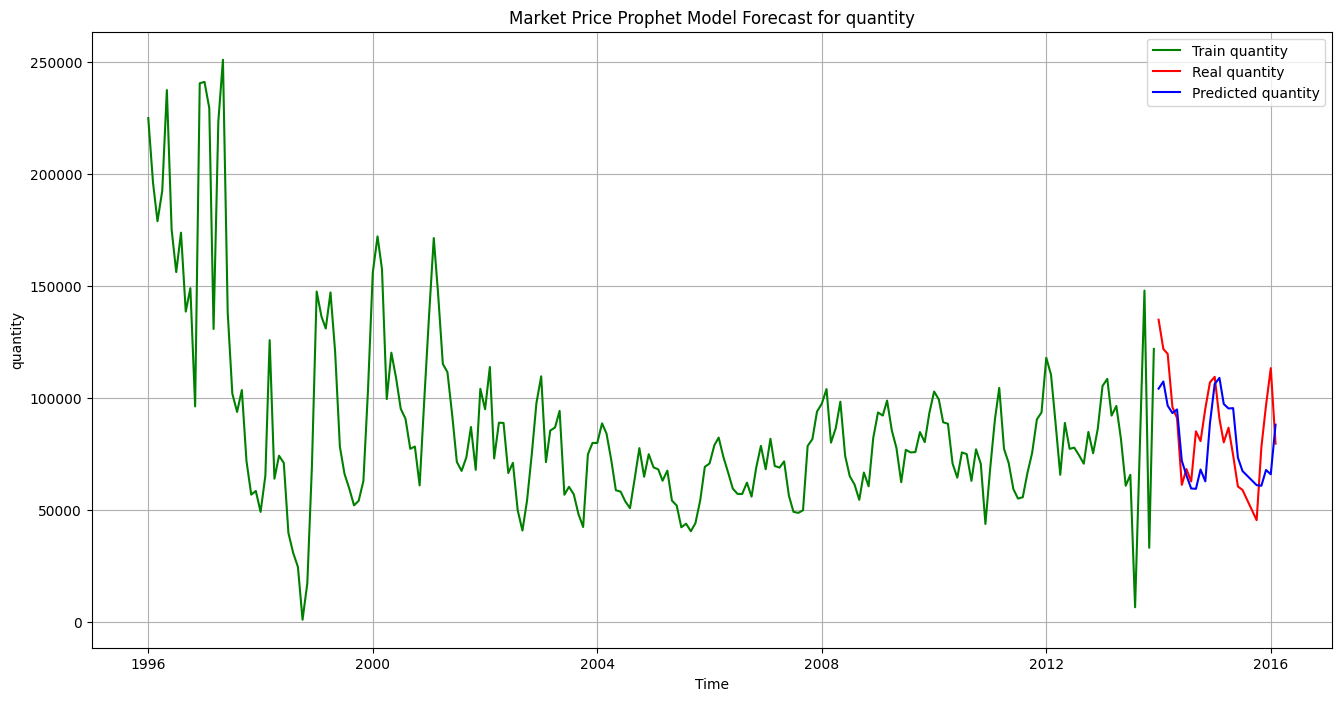

,Test_date,Test_quantity,Forecast_quantity
215,2014-01-01,135014.283333,104219.184256
216,2014-02-01,121911.245902,107421.734862
217,2014-03-01,119769.133333,96651.258907
218,2014-04-01,95980.338983,93311.907699
219,2014-05-01,91055.775862,94935.369888
220,2014-06-01,61250.916667,72028.176462
221,2014-07-01,68308.500000,65522.055412
222,2014-08-01,62748.442308,59636.820575
223,2014-09-01,85176.807018,59486.661768
224,2014-10-01,80782.385965,68102.320752


In [75]:
# Example usage
final_quantity_prophet = prophet_forecast(data_final, target_variable='quantity')

final_quantity_prophet

In [76]:
#forcast of price and quantity
prophet_final_forcast = pd.merge(final_price_prophet, final_quantity_prophet, on='Test_date')
prophet_final_forcast


,Test_date,Test_weighted_avg_price,Forecast_weighted_avg_price,Test_quantity,Forecast_quantity
0,2014-01-01,1031.363333,1152.361736,135014.283333,104219.184256
1,2014-02-01,781.409836,1034.580654,121911.245902,107421.734862
2,2014-03-01,836.593333,916.570243,119769.133333,96651.258907
3,2014-04-01,851.284746,867.384926,95980.338983,93311.907699
4,2014-05-01,949.706897,857.566056,91055.775862,94935.369888
5,2014-06-01,1217.055000,942.737593,61250.916667,72028.176462
6,2014-07-01,1621.259524,1032.379657,68308.500000,65522.055412
7,2014-08-01,1498.344231,1146.849791,62748.442308,59636.820575
8,2014-09-01,1384.133333,1193.665076,85176.807018,59486.661768
9,2014-10-01,1376.507018,1338.098242,80782.385965,68102.320752


# 😺 Model Building LSTM Model

Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture that excels in capturing long-term dependencies and patterns in sequential data. Its ability to retain information over long sequences makes it well-suited for time series forecasting tasks where historical context is crucial. LSTM models are adept at learning complex relationships and dynamics within sequential data, enabling accurate predictions even in the presence of noise and non-linear patterns. 🧠📊

Forecasting with LSTM:
LSTM models offer a powerful approach to time series forecasting, particularly when dealing with large volumes of data and intricate temporal patterns. Their capability to learn from past observations and capture temporal dependencies makes them effective tools for generating reliable forecasts across various domains, from finance and economics to healthcare and weather forecasting. 🌐🔮

Epoch 1/50
7/7 [==============================] - 12s 369ms/step - loss: 0.0669 - val_loss: 0.0533
Epoch 2/50
7/7 [==============================] - 0s 18ms/step - loss: 0.0388 - val_loss: 0.0241
Epoch 3/50
7/7 [==============================] - 0s 19ms/step - loss: 0.0399 - val_loss: 0.0817
Epoch 4/50
7/7 [==============================] - 0s 18ms/step - loss: 0.0383 - val_loss: 0.0645
Epoch 5/50
7/7 [==============================] - 0s 19ms/step - loss: 0.0339 - val_loss: 0.0315
Epoch 6/50
7/7 [==============================] - 0s 18ms/step - loss: 0.0348 - val_loss: 0.0314
Epoch 7/50
7/7 [==============================] - 0s 20ms/step - loss: 0.0336 - val_loss: 0.0407
Epoch 8/50
7/7 [==============================] - 0s 18ms/step - loss: 0.0332 - val_loss: 0.0306
Epoch 9/50
7/7 [==============================] - 0s 19ms/step - loss: 0.0309 - val_loss: 0.0273
Epoch 10/50
7/7 [==============================] - 0s 18ms/step - loss: 0.0314 - val_loss: 0.0297
Epoch 11/50
7/7 [==========

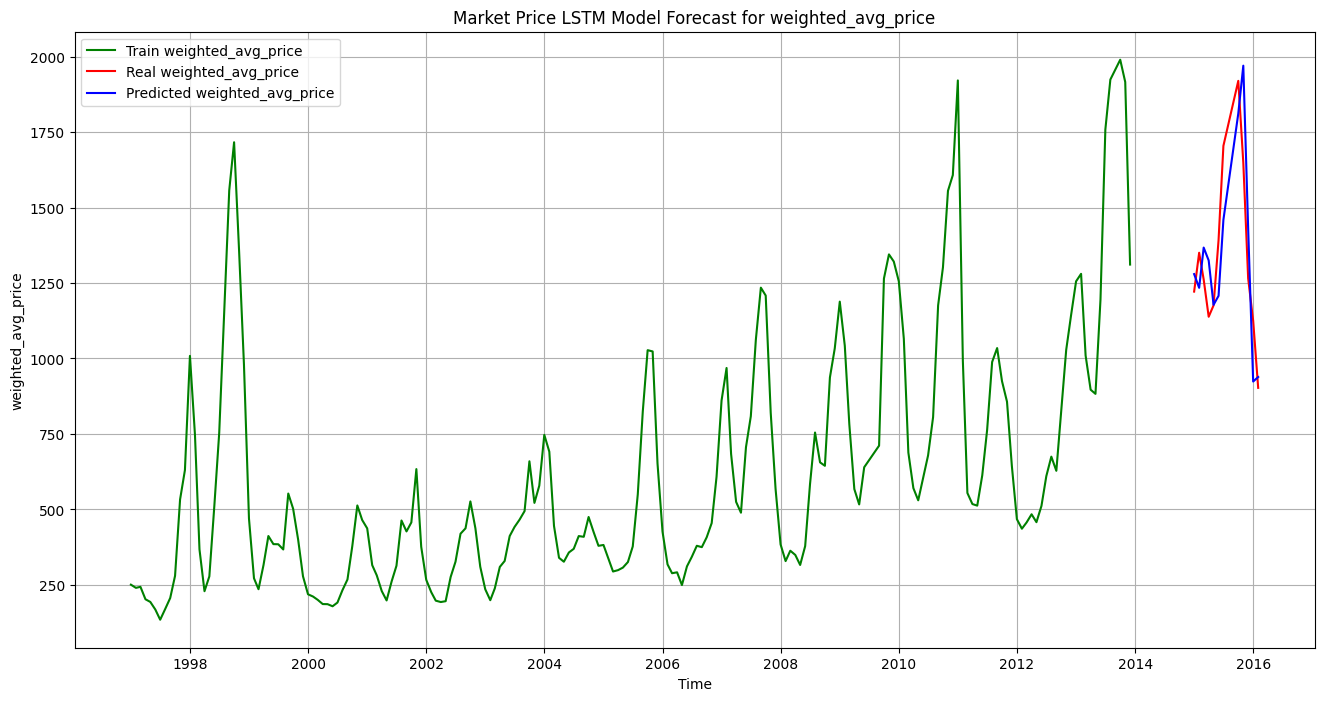

    Test_date  Test_weighted_avg_price  Forecast_weighted_avg_price
0  2015-01-01              1221.477922                  1279.494995
1  2015-02-01              1350.207500                  1233.972290
2  2015-03-01              1261.670886                  1367.354980
3  2015-04-01              1138.184524                  1324.593018
4  2015-05-01              1175.712346                  1177.684692
5  2015-06-01              1391.983562                  1207.531494
6  2015-07-01              1704.349180                  1459.312622
7  2015-10-01              1919.581818                  1811.499268
8  2015-11-01              1648.672549                  1969.893066
9  2015-12-01              1265.453571                  1430.893555
10 2016-01-01              1124.864198                   923.633484
11 2016-02-01               902.638272                   938.566101


In [84]:
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

def lstm_forecast(data, target_variable, seq_length=12, epochs=50, batch_size=32):
    # Copying the dataframe to avoid unintended modifications
    features = data.copy()

    # Drop unnecessary columns
    features.drop(['Seasonalweighted_avg_priceFirst Difference',
                   'SeasonalquantityFirst Difference'], axis=1, inplace=True)

    # Ensure 'date' is a datetime column and set it as index
    #features['date'] = pd.to_datetime(features['date'])
    features.set_index('date', inplace=True)

    # Isolate the target variable
    target_data = features[[target_variable]]

    # Split the data into training and test sets
    train_size = int(len(target_data) * 0.9)
    train_data, test_data = target_data[:train_size], target_data[train_size:]

    # Normalize the data
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train_data)
    test_scaled = scaler.transform(test_data)

    # Create sequences for the LSTM model
    x_train, y_train = create_sequences(train_scaled, seq_length)
    x_test, y_test = create_sequences(test_scaled, seq_length)

    # Reshape for LSTM input (samples, time steps, features)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

    # Make predictions
    predicted_prices = model.predict(x_test)

    # Invert scaling to get actual prices
    predicted_prices = scaler.inverse_transform(predicted_prices)
    actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate performance metrics
    mse = mean_squared_error(actual_prices, predicted_prices)
    mae = mean_absolute_error(actual_prices, predicted_prices)
    rmse = math.sqrt(mse)

    print('Mean Squared Error for', target_variable, ':', mse)
    print('Mean Absolute Error for', target_variable, ':', mae)
    print('Root Mean Squared Error for', target_variable, ':', rmse)

    # Plot the results
    plt.figure(figsize=(16, 8))
    plt.plot(train_data.index[seq_length:], scaler.inverse_transform(train_scaled)[seq_length:], color='green', label='Train ' + target_variable)
    plt.plot(test_data.index[seq_length:], actual_prices, color='red', label='Real ' + target_variable)
    plt.plot(test_data.index[seq_length:], predicted_prices, color='blue', label='Predicted ' + target_variable)
    plt.title('Market Price LSTM Model Forecast for ' + target_variable)
    plt.xlabel('Time')
    plt.ylabel(target_variable)
    plt.legend()
    plt.grid(True)
    plt.savefig('lstm_model.pdf')
    plt.show()

    # Storing results
    result = pd.DataFrame({
        'Test_date': test_data.index[seq_length:],
        f'Test_{target_variable}': actual_prices.flatten(),
        f'Forecast_{target_variable}': predicted_prices.flatten()
    })

    return result
#price output
final_price_lstm = lstm_forecast(data_final, target_variable='weighted_avg_price')
print(final_price_lstm)

Epoch 1/50
7/7 [==============================] - 11s 315ms/step - loss: 0.0708 - val_loss: 0.0063
Epoch 2/50
7/7 [==============================] - 0s 21ms/step - loss: 0.0232 - val_loss: 0.0091
Epoch 3/50
7/7 [==============================] - 0s 19ms/step - loss: 0.0175 - val_loss: 0.0078
Epoch 4/50
7/7 [==============================] - 0s 19ms/step - loss: 0.0185 - val_loss: 0.0070
Epoch 5/50
7/7 [==============================] - 0s 21ms/step - loss: 0.0176 - val_loss: 0.0067
Epoch 6/50
7/7 [==============================] - 0s 19ms/step - loss: 0.0178 - val_loss: 0.0062
Epoch 7/50
7/7 [==============================] - 0s 21ms/step - loss: 0.0182 - val_loss: 0.0069
Epoch 8/50
7/7 [==============================] - 0s 19ms/step - loss: 0.0168 - val_loss: 0.0062
Epoch 9/50
7/7 [==============================] - 0s 19ms/step - loss: 0.0175 - val_loss: 0.0064
Epoch 10/50
7/7 [==============================] - 0s 19ms/step - loss: 0.0160 - val_loss: 0.0062
Epoch 11/50
7/7 [==========

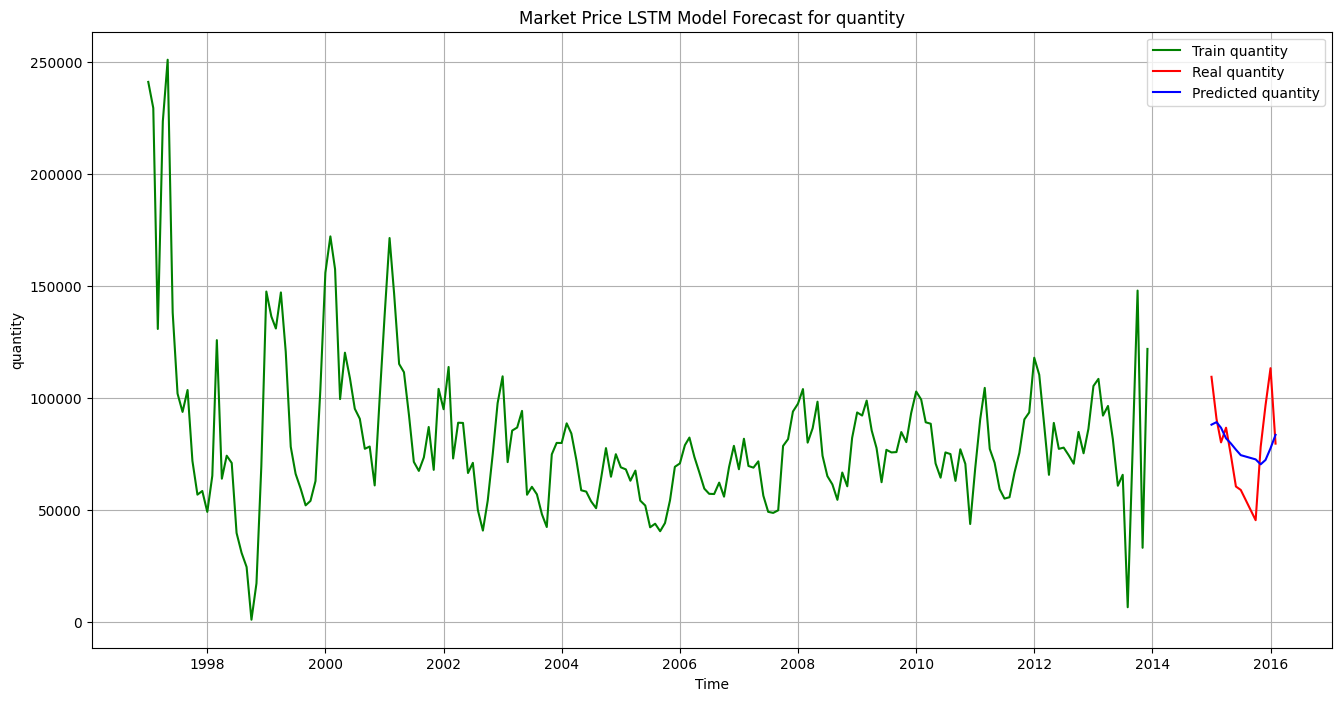

    Test_date  Test_quantity  Forecast_quantity
0  2015-01-01  109514.506494       88141.648438
1  2015-02-01   90724.037500       89269.140625
2  2015-03-01   80235.101266       86751.187500
3  2015-04-01   86783.690476       82033.468750
4  2015-05-01   74487.962963       79735.273438
5  2015-06-01   60522.671233       76985.867188
6  2015-07-01   58990.770492       74525.398438
7  2015-10-01   45478.454545       72634.937500
8  2015-11-01   78184.196078       70432.250000
9  2015-12-01   96727.059524       72375.578125
10 2016-01-01  113371.888889       77594.968750
11 2016-02-01   79671.049383       83597.765625


In [85]:
#price output
final_quantity_lstm = lstm_forecast(data_final, target_variable='quantity')
print(final_quantity_lstm)

In [86]:
#forcast of price and quantity
lstm_final_forcast = pd.merge(final_price_lstm, final_quantity_lstm, on='Test_date')
lstm_final_forcast


,Test_date,Test_weighted_avg_price,Forecast_weighted_avg_price,Test_quantity,Forecast_quantity
0,2015-01-01,1221.477922,1279.494995,109514.506494,88141.648438
1,2015-02-01,1350.207500,1233.972290,90724.037500,89269.140625
2,2015-03-01,1261.670886,1367.354980,80235.101266,86751.187500
3,2015-04-01,1138.184524,1324.593018,86783.690476,82033.468750
4,2015-05-01,1175.712346,1177.684692,74487.962963,79735.273438
5,2015-06-01,1391.983562,1207.531494,60522.671233,76985.867188
6,2015-07-01,1704.349180,1459.312622,58990.770492,74525.398438
7,2015-10-01,1919.581818,1811.499268,45478.454545,72634.937500
8,2015-11-01,1648.672549,1969.893066,78184.196078,70432.250000
9,2015-12-01,1265.453571,1430.893555,96727.059524,72375.578125


# 🐰 Comparative Model Performance Summary

In [94]:
# Define the data for the comparative DataFrame
data = {
    "Model": ["ARIMA", "ARIMA", "SARIMAX", "SARIMAX", "PROPHET", "PROPHET", "LSTM", "LSTM"],
    "Target_Variable": ["weighted_avg_price", "quantity", "weighted_avg_price", "quantity", "weighted_avg_price", "quantity", "weighted_avg_price", "quantity"],
    "Mean Squared Error": [29669.758405383862, 236084200.52636835, 32305.482400227844, 470685131.3355344, 99281.02580450824, 381010612.64662975, 28406.89041965098, 312483710.1814889],
    "Mean Absolute Error": [144.35143618921282, 13308.906365194598, 147.38653351774076, 17671.336509842622, 253.33083640299324, 16167.79283607524, 144.14228649907182, 14191.895339932535],
    "Root Mean Squared Error": [172.2491172847741, 15365.031745049157, 179.73725935439163, 21695.27901031776, 315.0889172987654, 19519.493145228687, 168.543437782819, 17677.20877801382]
}

# Create the DataFrame
comparative_df = pd.DataFrame(data)

# Format the numeric columns to 3 decimal places
comparative_df['Mean Squared Error'] = comparative_df['Mean Squared Error'].round(3)
comparative_df['Mean Absolute Error'] = comparative_df['Mean Absolute Error'].round(3)
comparative_df['Root Mean Squared Error'] = comparative_df['Root Mean Squared Error'].round(3)


# Separate DataFrames for each target variable
df_weighted_avg_price = comparative_df[comparative_df['Target_Variable'] == 'weighted_avg_price'].sort_values(by='Mean Absolute Error')
df_quantity = comparative_df[comparative_df['Target_Variable'] == 'quantity'].sort_values(by='Mean Absolute Error')



In [97]:
# Display the DataFrames
print("Comparative DataFrame for weighted_avg_price forcasting:")
df_weighted_avg_price



Comparative DataFrame for weighted_avg_price forcasting:


,Model,Target_Variable,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
6,LSTM,weighted_avg_price,28406.890,144.142,168.543
0,ARIMA,weighted_avg_price,29669.758,144.351,172.249
2,SARIMAX,weighted_avg_price,32305.482,147.387,179.737
4,PROPHET,weighted_avg_price,99281.026,253.331,315.089


In [96]:
# Display the DataFrame
print("\nComparative DataFrame for quantity forcasting:")
df_quantity


Comparative DataFrame for quantity forcasting:


,Model,Target_Variable,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
1,ARIMA,quantity,2.360842e+08,13308.906,15365.032
7,LSTM,quantity,3.124837e+08,14191.895,17677.209
5,PROPHET,quantity,3.810106e+08,16167.793,19519.493
3,SARIMAX,quantity,4.706851e+08,17671.337,21695.279


# 🐹 Summary

LSTM demonstrates superior performance in price forecasting, while ARIMA excels in quantity forecasting. Enhancements in model performance can be achieved through fine-tuning, increasing data volume, conducting extensive exploratory data analysis (EDA), and refining preprocessing techniques. Additionally, incorporating more diverse test data can further refine model accuracy. A combined approach leveraging both LSTM and ARIMA models can potentially yield robust performance, particularly in price forecasting and quantity forcasting.

Moreover, employing various aggregation methods like sum, mode, median, and demographic integration across different variables can further enhance forecasting accuracy and robustness.